### **Import Necessary Libraries**

In [1]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image
from tqdm import tqdm
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

### **Load Pre-trained VGG19, trained on ImageNet**

In [2]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

### **Freeze Layers of base_model**

In [3]:
for layer in base_model.layers[:-30]:
    layer.trainable = False

### **Create a new Top Layer for Classification**

In [4]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)  
x = Dropout(0.3)(x)  
output = Dense(1, activation='sigmoid')(x)

### **Compiling Model**

In [5]:
model = Model(inputs=base_model.input, outputs=output)

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
dataset = "Data"

subjects = os.listdir(dataset)
print(subjects)

['Jad Kandah', 'Jamil Hawwash', 'Jood Maan', 'Joseph Batbouta', 'Mohammad Al Shalloudi', 'Mohammad Al-Jonaidee', 'Mohammad Noor', 'Rami Hawwash', 'Rashid Kandah', 'Sukayna Madi']


### **Preparing Data**

In [7]:
awake = []
drowsy = []

for subject in subjects:
    subject_path = os.path.join(dataset, subject)
    for image in os.listdir(subject_path):
        if image.startswith("awake"):
            awake.append(os.path.join(subject_path, image))
        elif image.startswith("drowsy"):
            drowsy.append(os.path.join(subject_path, image))
        
print(f"Awake Images: {len(awake)}")
print(f"Drowsy Images: {len(drowsy)}")
print(f"Total Images: {len(awake) + len(drowsy)}")

Awake Images: 966
Drowsy Images: 988
Total Images: 1954


In [8]:
X = []
Y = []

# Process images from the directory (Awake)
for image in tqdm(awake):
    temp = np.array(Image.open(image).resize((64, 64))) # Resize the images to 64x64
    X.append(temp)
    Y.append(1)
    

# Process images from the directory (Drowsy)
for image in tqdm(drowsy):
    temp = np.array(Image.open(image).resize((64, 64))) # Resize the images to 64x64
    X.append(temp)
    Y.append(0)

100%|██████████| 988/988 [00:01<00:00, 664.06it/s]


In [9]:
# Convert the lists to numpy arrays
X = np.array(X)
Y = np.array(Y) 

X = X/255.0 # Normalize the images

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
# Data augmentation
data_generator = ImageDataGenerator(
    rotation_range=35,  
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    zoom_range=0.2,  
    fill_mode='nearest'
)

### **Training the Model**

In [12]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

train_generator = data_generator.flow(x_train, y_train, batch_size=32)

steps_per_epoch = len(x_train) // 32

history = model.fit(
    train_generator,
    epochs=100,
    steps_per_epoch=steps_per_epoch,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/100


C:\Users\moham\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 44s 811ms/step - accuracy: 0.5348 - loss: 0.7153 - val_accuracy: 0.4987 - val_loss: 0.6968
Epoch 2/100
 1/48 ━━━━━━━━━━━━━━━━━━━━ 33s 711ms/step - accuracy: 0.5000 - loss: 0.7145

C:\Users\moham\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5000 - loss: 0.7145 - val_accuracy: 0.4987 - val_loss: 0.6972
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 40s 827ms/step - accuracy: 0.4821 - loss: 0.7054 - val_accuracy: 0.5013 - val_loss: 0.6929
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.5312 - loss: 0.6827 - val_accuracy: 0.5013 - val_loss: 0.6906
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 39s 807ms/step - accuracy: 0.4948 - loss: 0.7017 - val_accuracy: 0.5601 - val_loss: 0.6226
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.6250 - loss: 0.6419 - val_accuracy: 0.7033 - val_loss: 0.5246
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 42s 863ms/step - accuracy: 0.8315 - loss: 0.4170 - val_accuracy: 0.8951 - val_loss: 0.2747
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.8125 - loss: 0.4350 - val_accuracy: 0.9079 - val_loss: 0.2642
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 46s 950ms/step - accuracy: 0.9052 - loss: 0.2731 - val_accuracy: 0.9130

In [13]:
model.save('model_30.keras')

In [14]:
# Load the Model
model = tf.keras.models.load_model('model_30.keras')

In [15]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             

 Total params: 61,647,557 (235.17 MB)

 Trainable params: 20,549,185 (78.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 41,098,372 (156.78 MB)

### **Evaluating the Model**

In [16]:
evaluation = model.evaluate(x_test, y_test)

print(f"Accuracy: {evaluation[1]:.3f}")
print(f"Loss: {evaluation[0]:.3f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - accuracy: 0.9665 - loss: 0.1004
Accuracy: 0.964
Loss: 0.111


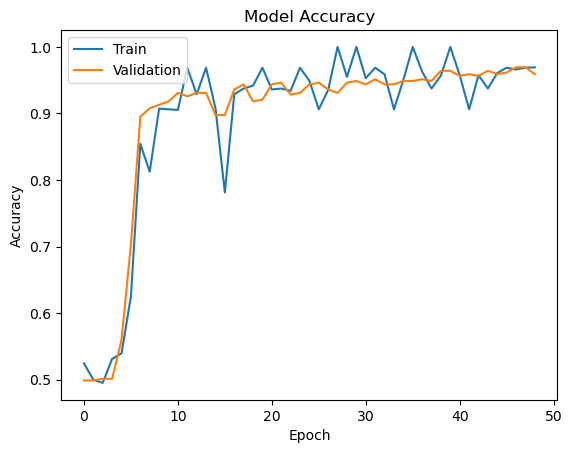

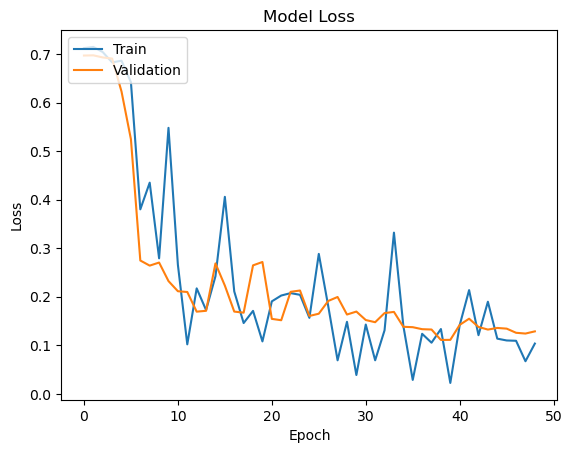

In [17]:
# Plotting Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()